# 第8章 预测数值型数据：回归

**本章内容：**
- 线性回归
- 局部加权线性回归
- 岭回归和逐步线性回归
- 预测鲍鱼年龄和玩具售价

## 8.1 用线性回归找到最佳拟合直线

<center>**线性回归**</center>
- 优点：结果易于理解，计算上不复杂。
- 缺点：对非线性的数据拟合不好。
- 使用数据类型：数值型和标称型数据。

<center>**回归的一般方法**</center>
(1)收集数据：采用任意方法收集数据。  
(2)准备数据：回归需要数值型数据，标称型数据将被转成二值型数据。  
(3)分析数据：绘出数据的可视化二维图将有助于对数据做出理解和分析，在采用缩减法求得新回归系数之后，可以将新拟合线绘在图上作为对比。  
(4)训练算法：找到回归系数。  
(5)测试算法：使用R2或者预测值和数据的拟合度，来分析模型的效果。  
(6)使用算法：使用回归，可以在给定输入的时候预测出一个数值，这是对分类方法的提升，因为这样可以预测连续型数据而不仅仅是离散的类别标签。

$$\tilde{w}=(X^{T}X)^{-1}X^{T}y$$

$w$上方的小标记表示，这是当前可以估计出的$w$的最优解。从现有数据上估计出的$w$可能并不是数据中的真实$w$值，所以这里使用了一个“帽”符号来表示它仅是$w$的一个最佳估计。

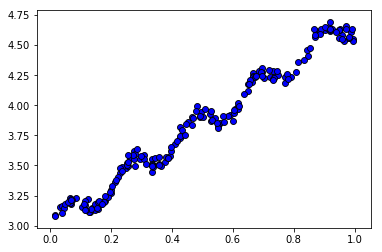

In [27]:
plt.scatter(np.array(xArr)[:,1], np.array(yArr), color='b', edgecolors='k', linewidths=0.88)
plt.show()

In [1]:
pwd

'C:\\Users\\hasee\\Documents\\Python Scripts\\MyGit\\Machine Learning\\Machine Learning in Action\\第8章 预测数值型数据：回归'

###### 程序清单8-1 标准回归函数和数据导入函数

In [2]:
import numpy as np

def loadDataSet(filename):
    numFeat = len(open(filename).readline().split('\t')) - 1
    dataMat = []
    labelMat = []
    fr = open(filename)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat

def standRegres(xArr, yArr):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    xTx = xMat.T * xMat
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return 
    ws = xTx.I * (xMat.T * yMat)
    return ws

In [3]:
xArr, yArr = loadDataSet('./Data/ex0.txt')

xArr[0:2]

[[1.0, 0.067732], [1.0, 0.42781]]

In [4]:
ws = standRegres(xArr, yArr)

ws

matrix([[ 3.00774324],
        [ 1.69532264]])

In [5]:
xMat = np.mat(xArr)
yMat = np.mat(yArr)
yHat = xMat * ws
yHat

matrix([[ 3.12257084],
        [ 3.73301922],
        [ 4.69582855],
        [ 4.25946098],
        [ 4.67099547],
        [ 3.89977285],
        [ 3.65007895],
        [ 3.06514517],
        [ 3.23286683],
        [ 3.24221654],
        [ 3.42785945],
        [ 4.10677005],
        [ 4.24737842],
        [ 3.40925159],
        [ 4.6518468 ],
        [ 4.03763819],
        [ 3.61572324],
        [ 3.25838991],
        [ 4.08905393],
        [ 3.39829811],
        [ 3.12681762],
        [ 3.12159094],
        [ 4.57689489],
        [ 4.22453225],
        [ 3.03380205],
        [ 3.575795  ],
        [ 3.07638008],
        [ 3.36812645],
        [ 4.05412689],
        [ 3.92524508],
        [ 3.08463121],
        [ 3.22264573],
        [ 3.95116656],
        [ 4.53547307],
        [ 4.63266931],
        [ 3.47321272],
        [ 3.67637171],
        [ 4.48687834],
        [ 3.70271024],
        [ 4.54873897],
        [ 3.29055527],
        [ 4.13515992],
        [ 3.4548456 ],
        [ 3

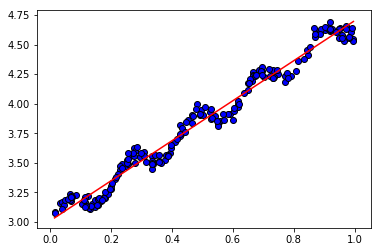

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:,1].flatten().A[0], yMat.T[:,0].flatten().A[0], c='b', edgecolors="k")

xCopy = xMat.copy()
xCopy.sort(0)
yHat = xCopy * ws
ax.plot(xCopy[:, 1], yHat, color='r')

plt.show()

In [8]:
yHat = xMat * ws
np.corrcoef(yHat.T, yMat)

array([[ 1.        ,  0.98647356],
       [ 0.98647356,  1.        ]])

## 8.2 局部加权线性回归

线性回归的一个问题是有可能出现欠拟合现象，因为它求的是具有最小均方误差的无偏估计。显而易见，如果模型欠拟合将不能取得最好的预测效果。所以有些方法允许在估计中引入一些偏差，从而降低预测的均方误差。  

其中的一个方法是**局部加权线性回归（Locally Weighted Linear Regression， LWLR）**。在该算法中，我们给待预测点附近的每个点赋予一定的权重；在这个子集上基于最小均方差来进行普通的回归。与kNN一样，这种算法每次预测均需要事先选取出对应的数据子集。该算法解出回归系数w的形式如下：  

$$\hat{w}=(X^{T}WX)^{-1}X^{T}Wy$$  

其中w是一个矩阵，用来给每个数据点赋予权重。  

LWLR使用“核”（与支持向量机中的核类似）来对附近的点赋予更高的权重。核的类型可以自由选择，最常用的核就是高斯核，高斯核对应的权重如下：  

$$w(i,i)=exp\left(\frac{\left|x^{(i)} - x\right|}{-2k^2}\right)$$

###### 程序清单8-2 局部加权线性回归函数

In [9]:
def lwlr(testPoint, xArr, yArr, k=1.0):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    m = np.shape(xMat)[0]
    weights = np.mat(np.eye(m))
    for j in range(m):
        diffMat = testPoint - xMat[j, :]
        weights[j,j] = np.exp(diffMat * diffMat.T / (-2.0 * k ** 2))
    xTx = xMat.T * (weights * xMat)
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return 
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws

def lwlrTest(testArr, xArr, yArr, k=1.0):
    m = np.shape(testArr)[0]
    yHat = np.zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i], xArr, yArr, k)
    return yHat        

In [10]:
xArr, yArr = loadDataSet('./Data/ex0.txt')
yArr[0]

3.176513

In [11]:
lwlr(xArr[0], xArr, yArr, 1.0)

matrix([[ 3.12204471]])

In [12]:
lwlr(xArr[0], xArr, yArr, 0.001)

matrix([[ 3.20175729]])

In [13]:
yHat = lwlrTest(xArr, xArr, yArr, 0.003)

In [14]:
xMat = np.mat(xArr)
srtInd = xMat[:, 1].argsort(0)
xSort = xMat[srtInd][:,0,:]

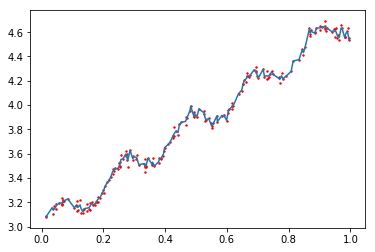

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xSort[:,1], yHat[srtInd])
ax.scatter(xMat[:,1].flatten().A[0], np.mat(yArr).T.flatten().A[0], s=2, c='red')
plt.show()

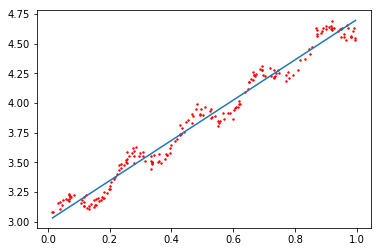

In [17]:
yHat = lwlrTest(xArr, xArr, yArr, 1.0)
xMat = np.mat(xArr)
srtInd = xMat[:, 1].argsort(0)
xSort = xMat[srtInd][:,0,:]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xSort[:,1], yHat[srtInd])
ax.scatter(xMat[:,1].flatten().A[0], np.mat(yArr).T.flatten().A[0], s=2, c='red')
plt.show()

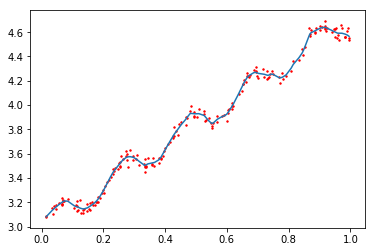

In [19]:
yHat = lwlrTest(xArr, xArr, yArr, 0.01)
xMat = np.mat(xArr)
srtInd = xMat[:, 1].argsort(0)
xSort = xMat[srtInd][:,0,:]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xSort[:,1], yHat[srtInd])
ax.scatter(xMat[:,1].flatten().A[0], np.mat(yArr).T.flatten().A[0], s=2, c='red')
plt.show()

## 8.3 示例：预测鲍鱼的年龄

In [29]:
def rssError(yArr, yHatArr):
    return ((yArr - yHatArr) ** 2).sum()

In [21]:
abX, abY = loadDataSet('./Data/abalone.txt')

In [28]:
yHat01 = lwlrTest(abX[:99], abX[0:99], abY[0:99], 0.1)
yHat1 = lwlrTest(abX[:99], abX[0:99], abY[0:99], 1)
yHat10 = lwlrTest(abX[:99], abX[0:99], abY[0:99], 10)

In [30]:
rssError(abY[0:99], yHat01.T)

56.784209118372083

In [31]:
rssError(abY[0:99], yHat1.T)

429.89056187030394

In [32]:
rssError(abY[0:99], yHat10.T)

549.11817088260648

可以看到，使用较小的核将得到较低的误差。那么，为什么不在所有数据集上都使用最小的核呢？这是因为使用最小的核将造成过拟合，对新数据不一定能打到最好的预测效果。下面就来看看它们在新数据上的表现：

In [33]:
yHat01 = lwlrTest(abX[100:199], abX[0:99], abY[0:99], 0.1)
rssError(abY[100:199], yHat01.T)

25119.459111157415

In [34]:
yHat1 = lwlrTest(abX[100:199], abX[0:99], abY[0:99], 1)
rssError(abY[100:199], yHat1.T)

573.52614418957057

In [36]:
yHat10 = lwlrTest(abX[100:199], abX[0:99], abY[0:99], 10)
rssError(abY[100:199], yHat10.T)

517.57119053817451

从上述结果可以看到，在上面的三个参数中，核大小等于10时的测试误差最小，但它在训练集上的误差却是最大的。接下来再来和简单的线性回归做个比较：

In [37]:
ws = standRegres(abX[0:99], abY[0:99])
yHat = np.mat(abX[100:199]) * ws
rssError(abY[100:199], yHat.T.A)

518.6363153249365

## 8.4 缩减系数来“理解”数据

#### 8.4.1 岭回归

简单来说，岭回归就是在矩阵$X^TX$上加一个$\lambda I$从而使得矩阵非奇异，进而能对$X^TX+\lambda I$求逆。其中矩阵$I$是一个m\*m的单位矩阵，对角线上元素全为1，其他元素全为0。

###### 程序清单8-3 岭回归

In [7]:
def ridgeRegres(xMat, yMat, lam=0.2):
    xTx = xMat.T * xMat
    denom = xTx + np.eye(np.shape(xMat)[1]) * lam
    if np.linalg.det(denom) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = denom.I * (xMat.T * yMat)
    return ws

def ridgeTest(xArr, yArr):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    yMean = np.mean(yMat, 0)
    yMat = yMat - yMean
    xMeans = np.mean(xMat, 0)
    xVar = np.var(xMat, 0)
    xMat = (xMat - xMeans) / xVar
    numTestPts = 30
    wMat = np.zeros((numTestPts, np.shape(xMat)[1]))
    for i in range(numTestPts):
        ws = ridgeRegres(xMat, yMat, np.exp(i - 10))
        wMat[i, :] = ws.T
    return wMat

In [18]:
yMat = yMat - yMean

In [19]:
xMeans = np.mean(xMat, 0)

In [17]:
yMean

matrix([[ 9.93368446]])

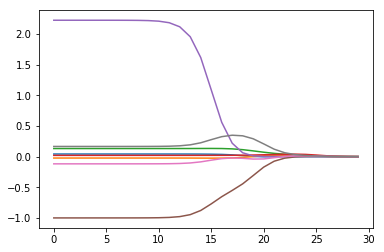

In [8]:
abX, abY = loadDataSet('./Data/abalone.txt')
ridgeWeights = ridgeTest(abX, abY)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ridgeWeights)
plt.show()

#### 8.4.2 lasso

In [20]:
pwd

'C:\\Users\\Administrator\\Documents\\Python\\MyGit\\Machine Learning\\Machine Learning in Action\\第8章 预测数值型数据：回归'